<a href="https://colab.research.google.com/github/jaiminjariwala/CNN-on-Food101-Dataset/blob/main_code/cnn_on_food101_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **I have used Food101 Dataset, However I have modified it to only use 2 classes (pizza 🍕 & steak 🥩) using the image data modification notebook:<br> https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb**

## **📥️Loading the data**

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-05-04 13:07:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 142.251.162.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   210MB/s    in 0.5s    

2023-05-04 13:07:09 (210 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



### 🔎**Inspect the data(become one with it)**
* A very crucial step at the beginning of any machine learning project is becoming one with data
* And for Computer Vision Project... this usually means Visualizing many samples of your data.

In [ ]:
# let's have a look at what is present in pizza_steak...
!ls pizza_steak

test  train


In [ ]:
# now let's have a look at what is present in test and train...
!ls pizza_steak/train

pizza  steak


In [ ]:
# let's now have a look at what is present inside the train --> steak...
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

# **Performing all imports here...**

In [ ]:
import os
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

import random
import warnings

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

from PIL import Image

In [ ]:
# Walk through the pizza_steak directory and list number of files.
# So there's a little function in OS called 'walk':
# import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May  4 12:49 .
drwxr-xr-x 4 root root 4096 May  4 13:07 ..
drwxr-xr-x 4 root root 4096 May  4 12:49 test
drwxr-xr-x 4 root root 4096 May  4 12:49 train


In [ ]:
# Another way to find out how many images in our file...

num_steak_images_train =  len(os.listdir("pizza_steak/train/steak"))

In [ ]:
num_steak_images_train

750

### **To visualize📊 our images, first let's get the class names programmatically...**

In [ ]:
# Getting the class names programmatically...
# import pathlib
# import numpy as np

data_dir = pathlib.Path("pizza_steak/train")   # In pathlib library there's a Class Parameterized Constructor Path()

class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

# The above line will create a list of class names from the subdirectories

print(class_names)

['pizza' 'steak']


![image.png](attachment:c541bb78-8df4-43d3-9139-724a03c57c09.png)

## **📉 Now let's Visualize our images...**

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# import random 

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)    # this will return a list
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0]) # random_image[0] --> so as to convert the list back into string
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("on");
    
    # Finally printing the Image Shape...
    print(f"Image Shape: {img.shape}")
    
    return img

![image.png](attachment:117fa489-5e2c-4db6-8818-e248991841a9.png)
![image.png](attachment:748fed34-911f-4ea3-8cda-1f272eb5333c.png)

['523535.jpg']
Image Shape: (512, 512, 3)
['2651300.jpg']
Image Shape: (512, 512, 3)
['1623325.jpg']
Image Shape: (512, 512, 3)
['3162376.jpg']
Image Shape: (512, 512, 3)


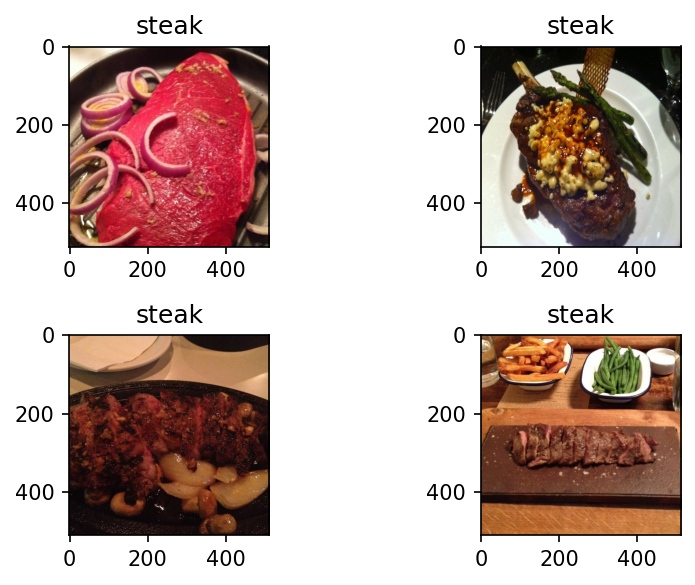

In [ ]:
# Viewing a random image from a training dataset...
plt.figure(dpi=150)

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    img = view_random_image(target_dir = "pizza_steak/train/",
                                 target_class = "steak")

['920219.jpg']
Image Shape: (383, 512, 3)
['1958364.jpg']
Image Shape: (512, 512, 3)
['1267359.jpg']
Image Shape: (512, 384, 3)
['68684.jpg']
Image Shape: (384, 512, 3)


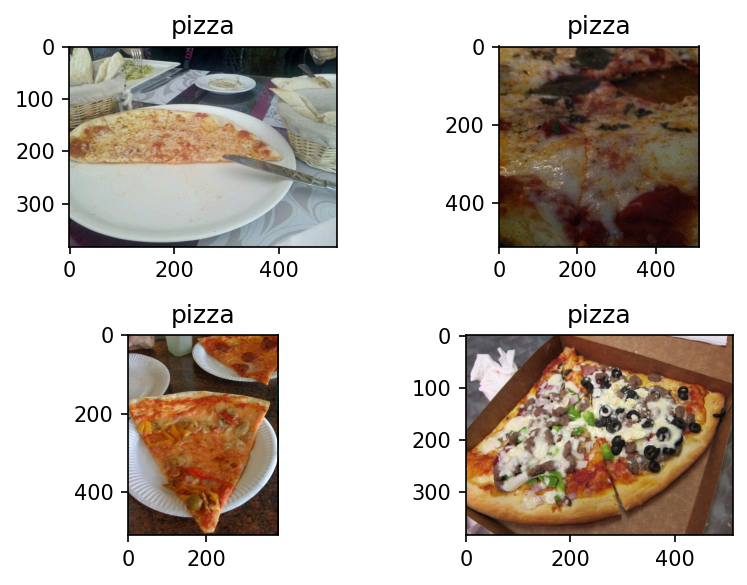

In [ ]:
plt.figure(dpi=150)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.tight_layout()
    img = view_random_image(target_dir = "pizza_steak/train/",
                                 target_class = "pizza")

In [ ]:
# The images we have imported and plotted are actually giant arrays / tensors of different pixel values

# import tensorflow as tf

# import warnings
warnings.filterwarnings('ignore')

print(tf.constant(img))

"""from below tensors,"""
"""[24 33 72] is basically 1st image 1st pixel value from all channels(R G B),"""
"""[27 36 75] is basically 1st image 2nd pixel value from all channels(R G B), and so on, it forms single image 2-D tensor from..."""
"""[[ 24  33  72]
    [ 27  36  75]
    [ 31  40  79]
    ...
    [105 121 146]
    [104 120 145]
    [109 125 150]]"""

"""The value are not normalized currently, hence the values lies between 0 - 512"""

tf.Tensor(
[[[ 85  86  88]
  [ 84  85  87]
  [ 82  83  85]
  ...
  [137  90  64]
  [139  92  62]
  [140  94  60]]

 [[ 86  87  89]
  [ 85  86  88]
  [ 83  84  86]
  ...
  [138  91  65]
  [138  91  61]
  [136  90  56]]

 [[ 87  88  90]
  [ 87  88  90]
  [ 86  87  89]
  ...
  [142  92  67]
  [137  91  58]
  [134  88  52]]

 ...

 [[102  81  90]
  [111  90  99]
  [124 103 112]
  ...
  [ 81  67  64]
  [ 79  65  62]
  [ 76  62  59]]

 [[ 96  81  88]
  [ 98  83  90]
  [103  86  94]
  ...
  [ 79  65  62]
  [ 78  64  61]
  [ 74  60  57]]

 [[111 100 106]
  [107  96 102]
  [101  88  95]
  ...
  [ 76  62  59]
  [ 75  61  58]
  [ 71  57  54]]], shape=(384, 512, 3), dtype=uint8)


'The value are not normalized currently, hence the values lies between 0 - 512'

In [ ]:
len(img)

384

In [ ]:
img.shape

(384, 512, 3)

### 💪🏽**Now let's build a Convolutional Neural Network to find patterns in our images, more specifically...**
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our Training Data.

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# set the seed
tf.random.set_seed(42)

# (Common Preprocessing step in Image Classification)
# Preprocess the data(get all of the pixel values between 0 and 1, also called scaling/normalization)

train_datagen = ImageDataGenerator(rescale=1./255) 
# Generates batches of tensor image data with real-time data-augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,            # common batch size!
                                              target_size = (224, 224),   # common target size(to convert into)
                                              class_mode = 'binary',    # saying, that we are dealing with only 2 classes(pizza and steak in our case)
                                              seed = 42)    # seed: for reproducibility

# takes the path to a directory & generates batches of augmented data

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              class_mode = 'binary',
                                              seed = 42)

# Now we will build a CNN to find the patterns in our images
model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (224, 224, 3)),    # 1st layer
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu'),    # 2nd layer
    MaxPool2D(pool_size = 2, padding = 'valid'),           # 3rd layer
    Conv2D(10, 3, activation = 'relu'),     # 4th layer
    Conv2D(10, 3, activation = 'relu'),     # 5th layer
    MaxPool2D(2),                           # 6th layer
    Flatten(),                             
    Dense(1, activation = 'sigmoid')
])

# Compiling our CNN model...
model_1.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# fit the model...
history_1 = model_1.fit(train_data, # the labels and data get created for us in train_data object
                       epochs = 5,
                       steps_per_epoch = len(train_data),  # 47
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

# flow_from_directory() method of ImageDataGenerator class, beautiful thing is... it creates the data and labels automatically for us, so no need to write... y_train with X_train as well!

# ETA : Estimated Time Of Arrival!

# MIMP NOTE: We are providing the validation data while fitting on model that means, we are saying... 
# Train for 1st epoch and get the evaluation on validation set, Train for 2nd epoch and get the evaluation on Validation set and so on!

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 530ms/step - loss: 0.5485 - accuracy: 0.7200 - val_loss: 0.3844 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 25s 525ms/step - loss: 0.4076 - accuracy: 0.8273 - val_loss: 0.3260 - val_accuracy: 0.8740
Epoch 3/5
47/47 [==============================] - 25s 521ms/step - loss: 0.3904 - accuracy: 0.8227 - val_loss: 0.3437 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 24s 509ms/step - loss: 0.3385 - accuracy: 0.8540 - val_loss: 0.3064 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.3360 - accuracy: 0.8567 - val_loss: 0.3006 - val_accuracy: 0.8860


![image.png](attachment:8fdf41fe-f402-4f7a-a76a-fbbb26b1fd29.png)

## 📈**Let's plot the training curves...**

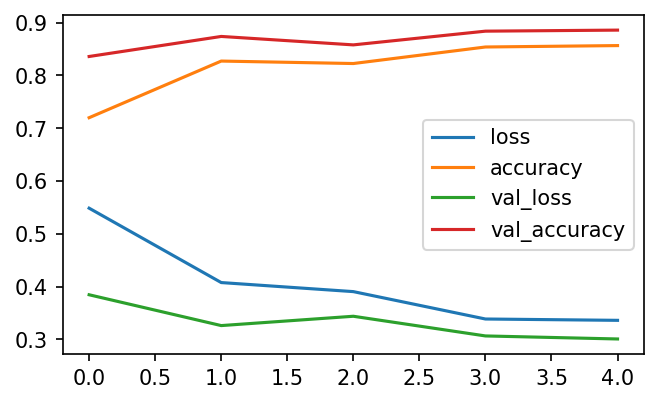

In [ ]:
plot_1 = pd.DataFrame(history_1.history)
plt.figure(dpi=150, figsize = (5,3))
plt.plot(plot_1)
plt.legend(plot_1)

In [ ]:
len(train_data)

# output = 47 because 1500/32 = 46.875 

47

In [ ]:
 model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 28090)            

## 💪🏽**Now let's make and ANN model without using the CNN and let's tryna getting the accuracy and number of trainable parameters**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2 = Sequential([
    Flatten(input_shape = (224, 224, 3)), 
    Dense(4, activation = 'relu'),Dense(4, activation = 'relu'), 
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# fit the model
history_2 = model_2.fit(train_data,
                     epochs = 5,
                     steps_per_epoch = len(train_data),
                     validation_data = valid_data,
                     validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 238ms/step - loss: 1.5175 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 224ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 231ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 278ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Getting a summary of a model_2
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


### 🤔**Hence despite having 20x more parameters than CNN model_1, model_2 performs terribly... so let's try to improve model_2!**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    Flatten(input_shape = (224, 224, 3)), 
    Dense(100, activation = 'relu'),Dense(100, activation = 'relu'), Dense(100, activation = 'relu'),
    Dense(1, activation = 'sigmoid') 
])

# compile the model
model_3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(lr=0.001),
               metrics = ['accuracy'])

# fit the model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 268ms/step - loss: 3.1980 - accuracy: 0.6480 - val_loss: 0.7399 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 0.7335 - accuracy: 0.7087 - val_loss: 1.0244 - val_accuracy: 0.6500
Epoch 3/5
47/47 [==============================] - 12s 254ms/step - loss: 0.8381 - accuracy: 0.7200 - val_loss: 0.6268 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 12s 258ms/step - loss: 0.5432 - accuracy: 0.7740 - val_loss: 0.6232 - val_accuracy: 0.7280
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.6066 - accuracy: 0.7600 - val_loss: 0.7045 - val_accuracy: 0.6580


In [ ]:
# Getting the summary of model_3
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## 📉 **let's plot the training curve for model_3**

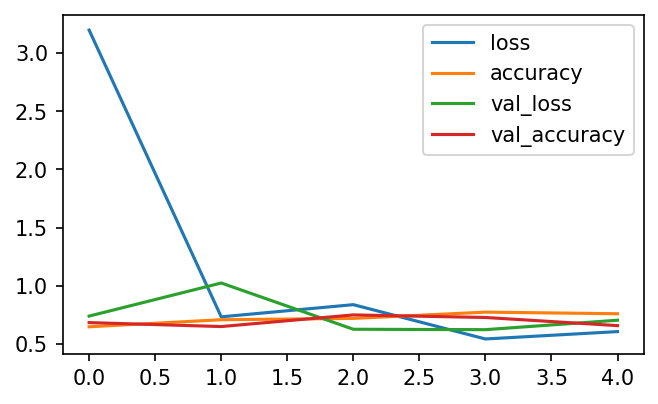

In [ ]:
plot_3 = pd.DataFrame(history_3.history)
plt.figure(figsize = (5,3), dpi=150)
plt.plot(plot_3)
plt.legend(plot_3)
plt.show()

In [ ]:
15_073_201/31_101    # which is equivalent to 500!

484.6532587376612

### **So model_3 in comparision to model_1(which is trained using Convolutional Neural Network) has 500x more parameters and still unable to achieve accuracy like CNN(model_1)**

# 📕**Most Imp Website for knowing Convolutional Neural Networks with Visualizations in depth...**
> ## 👉️**https://poloclub.github.io/cnn-explainer/#article-convolution**👈️

## ✏️✏️✏️**Note: When the model's validation loss if starts to increase then, it's likely that the model is *OVERFITTING* the training dataset. This means it's learning the patterns in the Training dataset "Too Well" and thus the model's ability to generalize to unseen data will be diminished !**

## 🛠️ **Ways to induce Overfitting...**
* Try increasing the number of Conv layers
* Try increasing the number of Conv filters
* Try adding another Dense layer to the output of our flattend layer
* Try tweaking Learning Rate of an optimizer

### **Another ways are:**
* Add Data Augmentation
* Add Regularization layers(such as MaxPool2D)

# 🏋️‍♂️**Creating yet another optimized Model(To achieve more accuracy and less parameters) by tweaking the Hyperparameters**

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model_4.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# fitting to the model
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

# Reducing overfitting using MaxPool2D is also called as Regularization!

Epoch 1/5
47/47 [==============================] - 17s 339ms/step - loss: 0.5906 - accuracy: 0.6813 - val_loss: 0.5076 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 16s 330ms/step - loss: 0.4953 - accuracy: 0.7653 - val_loss: 0.4209 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 16s 335ms/step - loss: 0.4467 - accuracy: 0.8000 - val_loss: 0.4314 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 15s 326ms/step - loss: 0.4369 - accuracy: 0.8153 - val_loss: 0.4362 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 16s 336ms/step - loss: 0.4224 - accuracy: 0.8147 - val_loss: 0.3785 - val_accuracy: 0.8400


In [ ]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6760)             

### **Again we have drastically reduced the trainable parameters from model_1**
## 📈**Looking at the training plot of model_4...**

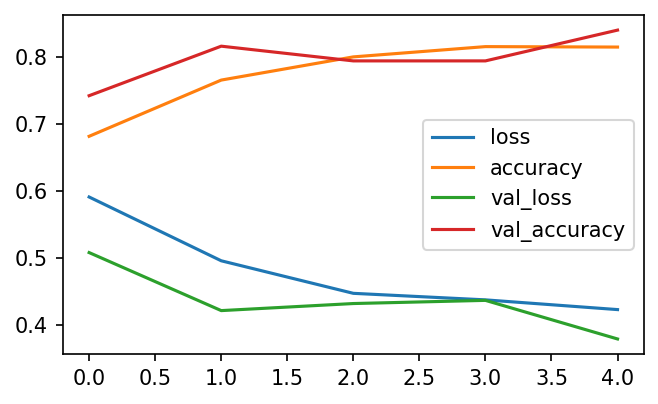

In [ ]:
plot_4 = pd.DataFrame(history_4.history)
plt.figure(dpi=150, figsize=(5,3))
plt.plot(plot_4)
plt.legend(plot_4)

# 💪🏼**Creating a yet another model and this time using Data Augmentation for inducing Overfitting**

### **What is Data Augmentation?**
* **Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar**
![image.png](attachment:f835fa0e-d74e-4d29-9173-f0f1d400249b.png)

## ⚙️**Setting up paths to data directories**

In [ ]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

## ✳️**Create ImageDataGenerator training instance with data augmentation...**

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, # how much do you want to rotate an image?
                                            shear_range=0.2, # we fix one axis and stretch the image at a certain angle known as the shear angle.
                                            zoom_range=0.2, # zoom in (value<1.0 -> magnifies, value>1.0 -> zooms out)
                                            width_shift_range=0.2, # move image around on the x-axis
                                            height_shift_range=0.2, # move image around on the y-axis
                                            horizontal_flip=True)  # this is basically the instance of train data being augmented!

# Create ImageDataGenerator without data augmentation for train dataset
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

## 📥️**Import the data and augment it from training directory**
## *Creating and training a model without Shuffling this time, later on we will look at the data with Shuffling i.e shuffle=True*

In [ ]:
print("Augmented Training Data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False) # shuffle=True that mean we want more randomness in our dataset!

# Create non-augmented train data batches...
print("Non-Augmented Training Data:")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)

# Create non-augmented test data batches...
print("Non-Augmented Test Data:")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary')

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data:
Found 500 images belonging to 2 classes.


### **Data Augmentation is usually only performed on the training data.Using 'ImageDataGenerator' built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model**

### 📊**Now let's visualize the Augmented Data...**

In [ ]:
# Get the sample data batches...
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: Labels aren't augmented... only data (images)

![image.png](attachment:bcf1c2e2-61f8-4198-a59f-d369b3e77aee.png)

In [ ]:
print("Image Shape of Train_Data:",images.shape, "\nImages Shape of Augmented Train Data:", augmented_images.shape,
     "\n\nLength of Labels of Train Data as well as Augmented Train Data:",len(labels))
# Each image is of shape (224, 224, 3) and there are 32 such images in a single batch!

print("\nLabels of Train Data:", labels)
print("Labels of Augmented Trained Data:", augmented_labels)

Image Shape of Train_Data: (32, 224, 224, 3) 
Images Shape of Augmented Train Data: (32, 224, 224, 3) 

Length of Labels of Train Data as well as Augmented Train Data: 32

Labels of Train Data: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Labels of Augmented Trained Data: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


![image.png](attachment:0f870730-1d3c-47e7-b716-c4a8ead729f2.png)

## **👀Now let's look at the Original image and Augmented image...** 

Showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

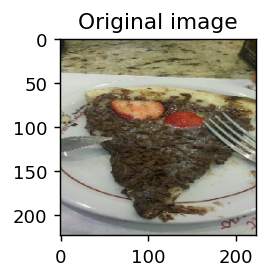

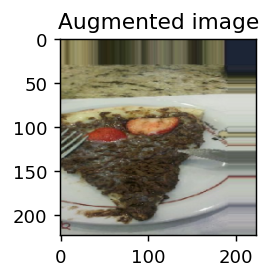

In [ ]:
random_number = random.randint(0, 32)  # because our batch size are 32
print(f"Showing image number: {random_number}")

plt.figure(dpi=130, figsize=(3,2))
plt.imshow(images[random_number])   # from train_data images, select randomly
plt.title(f"Original image")
plt.axis(True)

plt.figure(figsize=(3,2), dpi=130) # used to create a new figure object in matplotlib, which is container for 1 or more objects
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(True)

![image.png](attachment:dd534bda-5eb3-411d-8eb7-597db9ad388a.png)

### 💪🏼**Now we've seen what augmented training data looks like, let's build a Model and see how it learns on Augmented Data...**

In [ ]:
# Create the model...
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model...
model_5.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Fitting the model_5 on Augmented Training Data...
history_5 = model_5.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 685ms/step - loss: 0.8109 - accuracy: 0.4180 - val_loss: 0.7033 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 32s 679ms/step - loss: 0.6651 - accuracy: 0.6067 - val_loss: 0.9270 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 32s 684ms/step - loss: 0.7050 - accuracy: 0.5727 - val_loss: 0.6381 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 32s 680ms/step - loss: 0.7024 - accuracy: 0.5887 - val_loss: 0.6484 - val_accuracy: 0.7320
Epoch 5/5
47/47 [==============================] - 32s 679ms/step - loss: 0.6979 - accuracy: 0.5773 - val_loss: 0.6765 - val_accuracy: 0.6920


In [ ]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6760)            

## 📉**Let's Define a function for plotting up the curve of TRAINING HISTORY so that we don't need to plot it again and again and can able to resuse this function upon call**

In [ ]:
def plot_curve(model_history):
    """This function will plot the curves between (Training and Validation Accuracy) and (Training and Validation Loss)!"""
    accuracy = model_history.history['accuracy']
    val_accuracy = model_history.history['val_accuracy']

    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(len(accuracy))

    plt.figure(figsize=(5,3), dpi=130)
    plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Valiation Accuracy')
    plt.title("Training and Validation Accuracy")
    plt.legend()

    plt.figure(figsize=(5,3), dpi=130)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title("Training and Validation loss")
    plt.legend()

    plt.show()

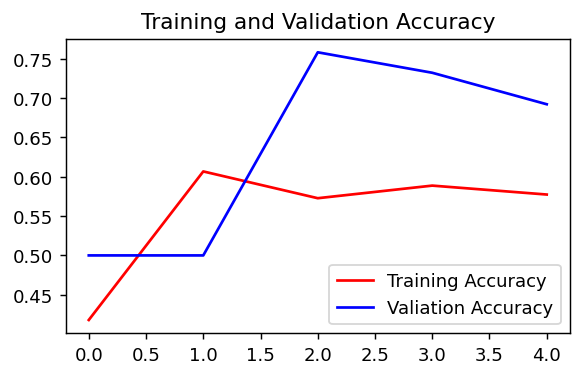

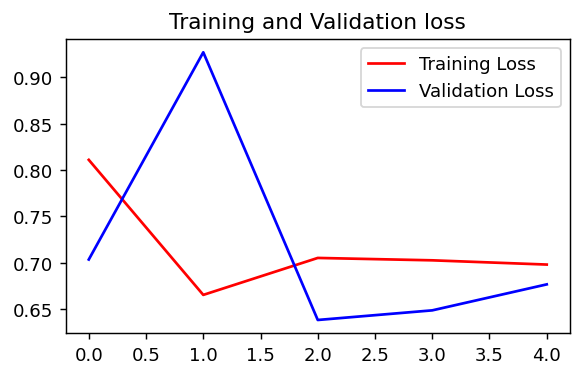

In [ ]:
plot_curve(history_5)

# 🏋️‍♂️**Creating an another model using Data Augmentation and this time enabling the Shuffling to see whether we are getting an increase in Accuracy or not**

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir, target_size=(224,224),
                                                                           batch_size=32, class_mode='binary', shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Creating the model...
model_6 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='same'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, padding='same'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compiling the model...
model_6.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

# Fitting upon an Augmented Shuffled Training Data...
history_6 = model_6.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled),
                       validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 42s 870ms/step - loss: 0.6064 - accuracy: 0.6713 - val_loss: 0.4063 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 41s 862ms/step - loss: 0.5147 - accuracy: 0.7353 - val_loss: 0.3966 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 41s 877ms/step - loss: 0.4952 - accuracy: 0.7567 - val_loss: 0.4053 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 40s 856ms/step - loss: 0.4758 - accuracy: 0.7673 - val_loss: 0.3466 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 41s 869ms/step - loss: 0.4452 - accuracy: 0.7893 - val_loss: 0.3624 - val_accuracy: 0.8340


## 😀**Hence on enabling the shuffling, we got an increase in Validation Accuracy as the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide variety of images(in our case, pizza and steak at the same time instead of just pizza then steak)!**

In [ ]:
model_6.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 28090)           

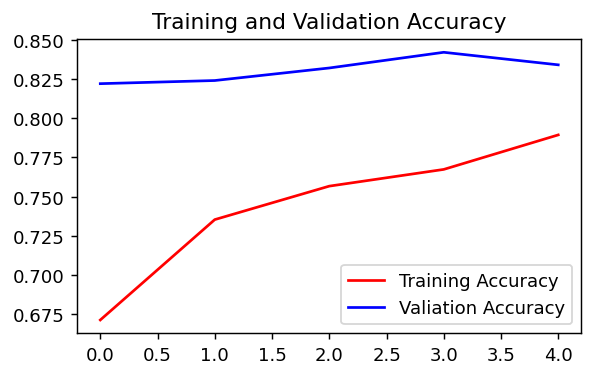

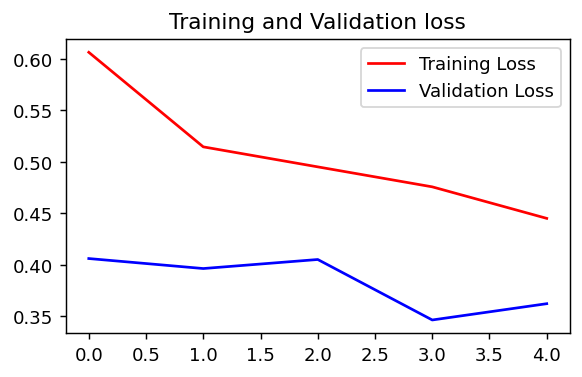

In [ ]:
plot_curve(history_6)

## 🧮**Making a prediction with our trained model on our own custom data...**

In [ ]:
# from PIL import Image

image = Image.open('/kaggle/input/steak-image/steak_image.jpg')

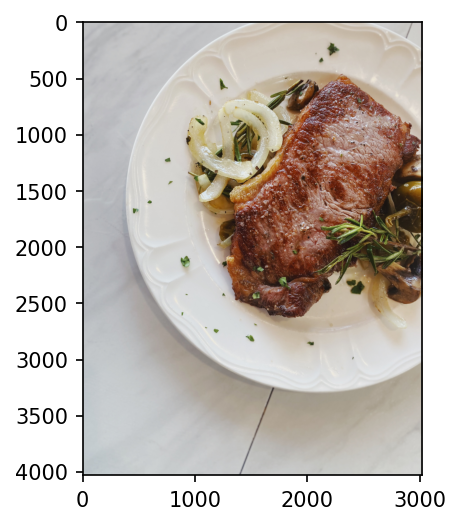

In [ ]:
plt.figure(figsize=(4,4), dpi=150)
steak = plt.imshow(image)

## ✏️✏️✏️**Note: When we train a NEURAL NETWORK and we want to make a prediction with it on our own custom data, it's important that our custom data(or new data) is preprocessed into the same format as the data on which our model was trained on!**

**So let's create a function to import an image and resize it to be able to be able to use with our model...**

In [ ]:
def load_and_prep_image(filename, img_shape=(224)):
    """
    Reads an image from filename, turns it into a tensor and reshapes it into(img_shape, img_shape, color_channels)
    """
    # Read the image
    img = tf.io.read_file(filename)
    
    # Decode the read file into the tensor
    img = tf.image.decode_image(img)
    print("Decoded Read file converted into the tensor, Shape:\n",img.shape)
    
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    print("\nResized image Shape:\n", img.shape)
    
    # Rescale the image and get all the values between 0 and 1
    img = img/255.
    print("\nScaled image:\n",img)
    return img

In [ ]:
steak = load_and_prep_image('/kaggle/input/steak-image/steak_image.jpg')

Decoded Read file converted into the tensor, Shape:
 (4032, 3024, 3)

Resized image Shape:
 (224, 224, 3)

Scaled image:
 tf.Tensor(
[[[0.75686276 0.7607843  0.76862746]
  [0.75686276 0.7607843  0.76862746]
  [0.7647059  0.76862746 0.7764706 ]
  ...
  [0.79607844 0.7921569  0.78431374]
  [0.8        0.79607844 0.7882353 ]
  [0.80784315 0.79607844 0.7764706 ]]

 [[0.7607843  0.7647059  0.77254903]
  [0.7607843  0.7607843  0.76862746]
  [0.75686276 0.7607843  0.76862746]
  ...
  [0.80784315 0.7921569  0.7882353 ]
  [0.7980392  0.7941176  0.7862745 ]
  [0.80784315 0.7921569  0.78039217]]

 [[0.7607843  0.7647059  0.77254903]
  [0.7607843  0.7647059  0.77254903]
  [0.7622549  0.76617646 0.7740196 ]
  ...
  [0.8        0.79607844 0.78039217]
  [0.8117647  0.79607844 0.7921569 ]
  [0.8068628  0.7911765  0.7794118 ]]

 ...

 [[0.72156864 0.75686276 0.7764706 ]
  [0.7245098  0.7647059  0.7745098 ]
  [0.7235294  0.7588235  0.77843136]
  ...
  [0.827451   0.827451   0.81960785]
  [0.8093137  0.8

#### **Now we need to expand the dimension to 4D because our current dimension is of the shape(height, width, color_channels) but we want (batches, height, width, color_channels) for our model to predict...**

In [ ]:
pred = model_6.predict(tf.expand_dims(steak, axis=0))    
pred

array([[0.95577735]], dtype=float32)

## 👀 **0.95 is the Predictions Probability of image belonging to class Steak!, We can index the predicted class by rounding the prediction probability and indexing it on the class names**

In [ ]:
tf.round(pred)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [ ]:
pred_class = class_names[int(tf.round(pred))]    # 1. --> int(1.) --> 1 --> class_names[1] --> steak
pred_class

'steak'

## ♻️**Let's Create a function (predict and plot)...**

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and the predicted class
    plt.figure(figsize=(4,3), dpi=150)
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(True)

## 🔥**Testing our model on a custom image finally!**

Decoded Read file converted into the tensor, Shape:
 (4032, 3024, 3)

Resized image Shape:
 (224, 224, 3)

Scaled image:
 tf.Tensor(
[[[0.75686276 0.7607843  0.76862746]
  [0.75686276 0.7607843  0.76862746]
  [0.7647059  0.76862746 0.7764706 ]
  ...
  [0.79607844 0.7921569  0.78431374]
  [0.8        0.79607844 0.7882353 ]
  [0.80784315 0.79607844 0.7764706 ]]

 [[0.7607843  0.7647059  0.77254903]
  [0.7607843  0.7607843  0.76862746]
  [0.75686276 0.7607843  0.76862746]
  ...
  [0.80784315 0.7921569  0.7882353 ]
  [0.7980392  0.7941176  0.7862745 ]
  [0.80784315 0.7921569  0.78039217]]

 [[0.7607843  0.7647059  0.77254903]
  [0.7607843  0.7647059  0.77254903]
  [0.7622549  0.76617646 0.7740196 ]
  ...
  [0.8        0.79607844 0.78039217]
  [0.8117647  0.79607844 0.7921569 ]
  [0.8068628  0.7911765  0.7794118 ]]

 ...

 [[0.72156864 0.75686276 0.7764706 ]
  [0.7245098  0.7647059  0.7745098 ]
  [0.7235294  0.7588235  0.77843136]
  ...
  [0.827451   0.827451   0.81960785]
  [0.8093137  0.8

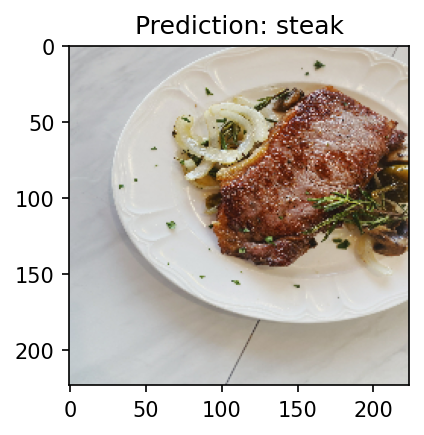

In [ ]:
pred_and_plot(model_6, '/kaggle/input/steak-image/steak_image.jpg')